In [1]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from functools import partial
from torchani.units import *
import h5py, pickle

In [2]:
title_size = 22
smaller_size = 18
tick_size = 14

In [3]:
# decorator builder that help build a decorator to traverse on a given folder
def partial_traverse_tool(f, datadir, accumulate):
    def t(*args, **kwargs):
        ret = None
        for file in datadir.glob('*.npz'):
            db = np.load(file)
            r = f(db,*args, **kwargs)
            if ret == None:
                ret = r
            else:
                existing = ret.keys()
                for k,v in r.items():
                    if k in existing:
                        ret[k] = accumulate(ret[k], v)
                    else:
                        ret[k] = v
        return ret
    return t

In [4]:
# below are statistic facts of original HCNO bond breaking dataset 
# total number of datapoints: 13144877
bb_source_dir = Path("/storage/users/shuhao/bb_datasets_final/bond_breaking_4el")
ani_1x_dir = Path("/storage/users/shuhao/ani1x_b973c_07152021")
# For convenience, I put a screenshot of keys in each npz file below:

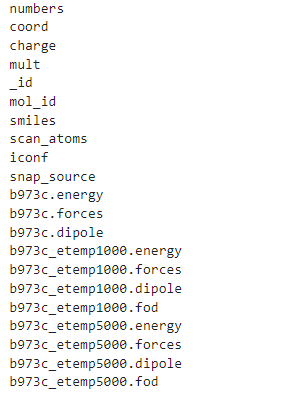

In [5]:
# conformer size distribution
sizes = []
counts = []
for i in range(3,24):
    sizes.append(i)
    db_name = bb_source_dir/("%.3d.npz" %(i))
    db = np.load(db_name)
    counts.append(db['numbers'].shape[0])

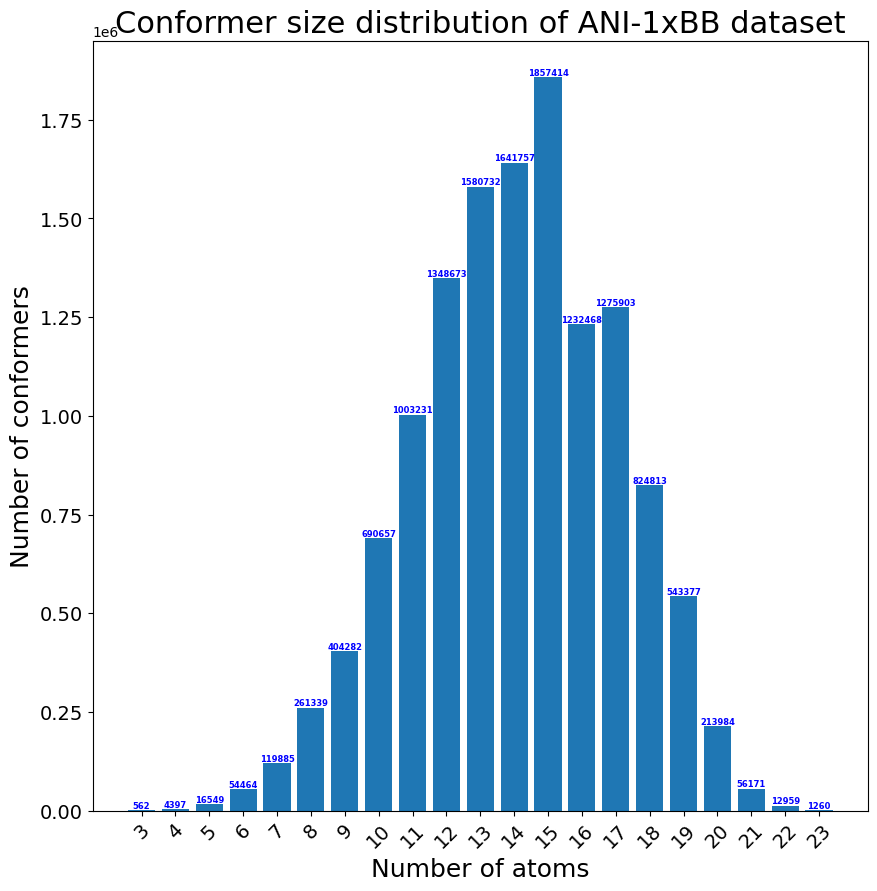

In [6]:
# create a figure with 1x1 grid
fig, ax = plt.subplots(1,1, figsize=(10,10))
# plot the distribution
ax.bar(sizes, counts)

for s,c in zip(sizes, counts):
    plt.text(s, c, str(c) , color='blue', fontweight='bold'
                , ha='center', va='bottom'
                , fontsize=6)

# set labels and title
ax.set_xlabel("Number of atoms", fontsize=smaller_size)
ax.set_ylabel("Number of conformers", fontsize=smaller_size)
ax.set_title("Conformer size distribution of ANI-1xBB dataset", fontsize=title_size)
#enforce all xticks to be shown
ax.set_xticks(sizes)
# set tick size
ax.tick_params(axis='y', which='major', labelsize=tick_size)
ax.tick_params(axis='x', which='major', labelsize=tick_size, rotation=45)
plt.show()

In [5]:
# conformer size distribution
ret = {}
for f in ani_1x_dir.glob("*.npz"):
    size = int(f.stem.split(".")[0])
    db = np.load(f)
    counts = db['numbers'].shape[0]
    ret[size] = counts

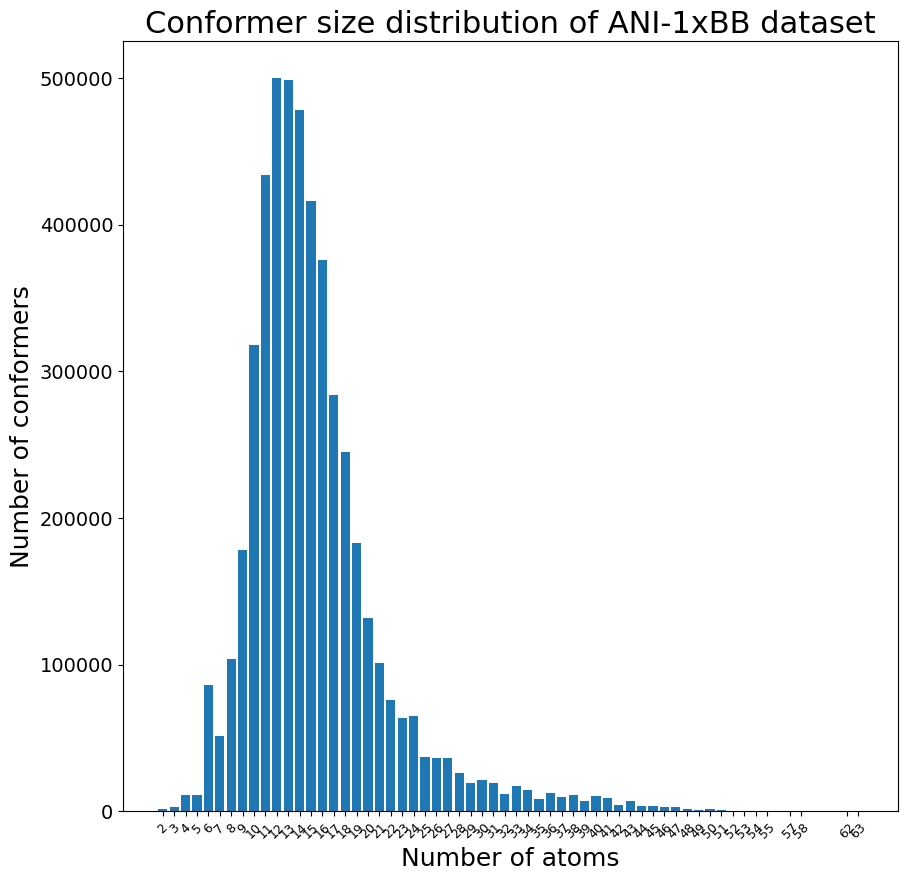

In [10]:
ret = dict(sorted(ret.items()))
sizes = list(ret.keys())
counts = list(ret.values())

# create a figure with 1x1 grid
fig, ax = plt.subplots(1,1, figsize=(10,10))
# plot the distribution
ax.bar(sizes, counts)

'''
for s,c in zip(sizes, counts):
    plt.text(s, c, str(c) , color='blue', fontweight='bold'
                , ha='center', va='bottom'
                , fontsize=6)
'''

# set labels and title
ax.set_xlabel("Number of atoms", fontsize=smaller_size)
ax.set_ylabel("Number of conformers", fontsize=smaller_size)
ax.set_title("Conformer size distribution of ANI-1xBB dataset", fontsize=title_size)
#enforce all xticks to be shown
ax.set_xticks(sizes)
# set tick size
ax.tick_params(axis='y', which='major', labelsize=tick_size)
ax.tick_params(axis='x', which='major', labelsize=9, rotation=45)
plt.show()

In [16]:
#single point energy distributions
traverse_tool = partial(partial_traverse_tool, datadir=bb_source_dir, accumulate=lambda x,y:np.concatenate((x,y)))
@traverse_tool
def check_energy(db):
    N = int(Path(db.fid.name).stem)
    return {'normalized_b973c.energy':db['b973c.energy'],
            'normalized_b973c_etemp1000.energy':db['b973c_etemp1000.energy'],
            'normalized_b973c_etemp5000.energy':db['b973c_etemp5000.energy']}

ret = check_energy()

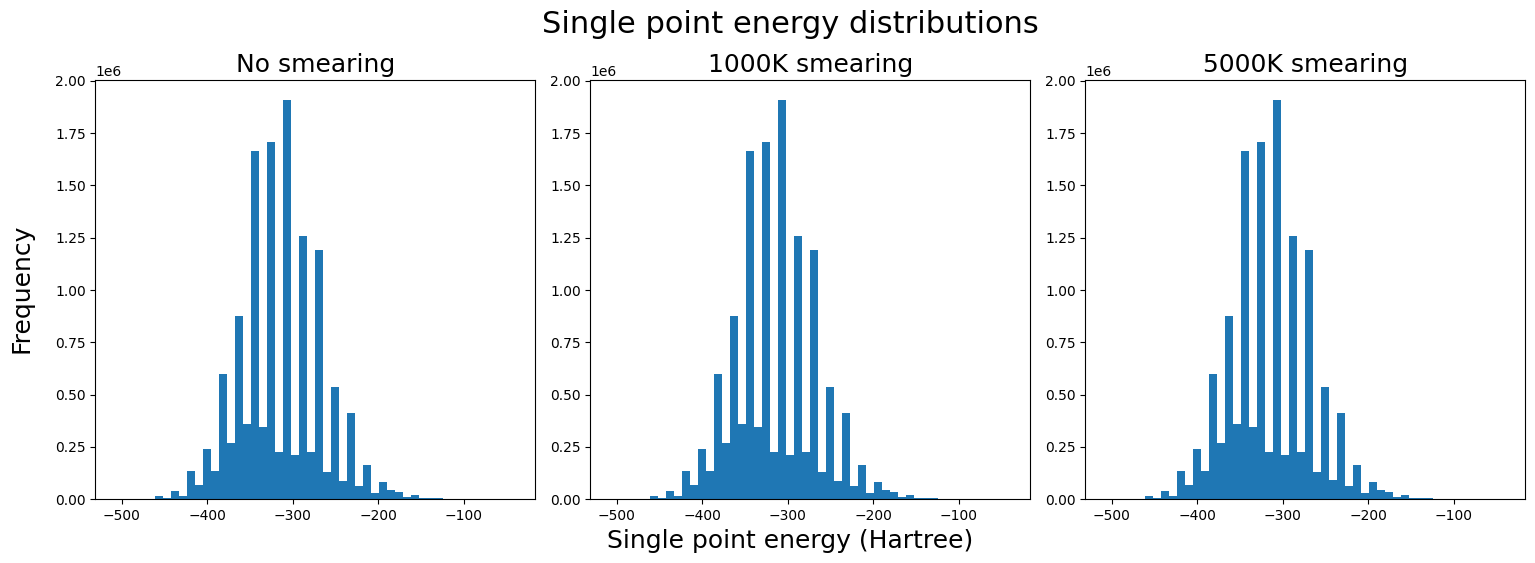

In [19]:
# create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1,3, figsize=(15,5))
# plot the histogram of normalized energies
keys_to_plot = ['No smearing', '1000K smearing', '5000K smearing']
for i, (k,v) in enumerate(ret.items()):
    axs[i].hist(v, bins=50)
    axs[i].set_title(keys_to_plot[i], fontsize=smaller_size)

#add a title to the figure
fig.text(0.5, 1.01, 'Single point energy distributions', ha='center', fontsize=title_size)
#add public x label
fig.text(0.5, -0.02, 'Single point energy (Hartree)', ha='center', fontsize=smaller_size)
#add public y label
fig.text(-0.02, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=smaller_size)
fig.tight_layout()
plt.show()

In [5]:
#normalized energy distributions
traverse_tool = partial(partial_traverse_tool, datadir=bb_source_dir, accumulate=lambda x,y:np.concatenate((x,y)))
@traverse_tool
def check_energy(db):
    N = int(Path(db.fid.name).stem)
    return {'normalized_b973c.energy':db['b973c.energy']/N,
            'normalized_b973c_etemp1000.energy':db['b973c_etemp1000.energy']/N,
            'normalized_b973c_etemp5000.energy':db['b973c_etemp5000.energy']/N}

ret = check_energy()

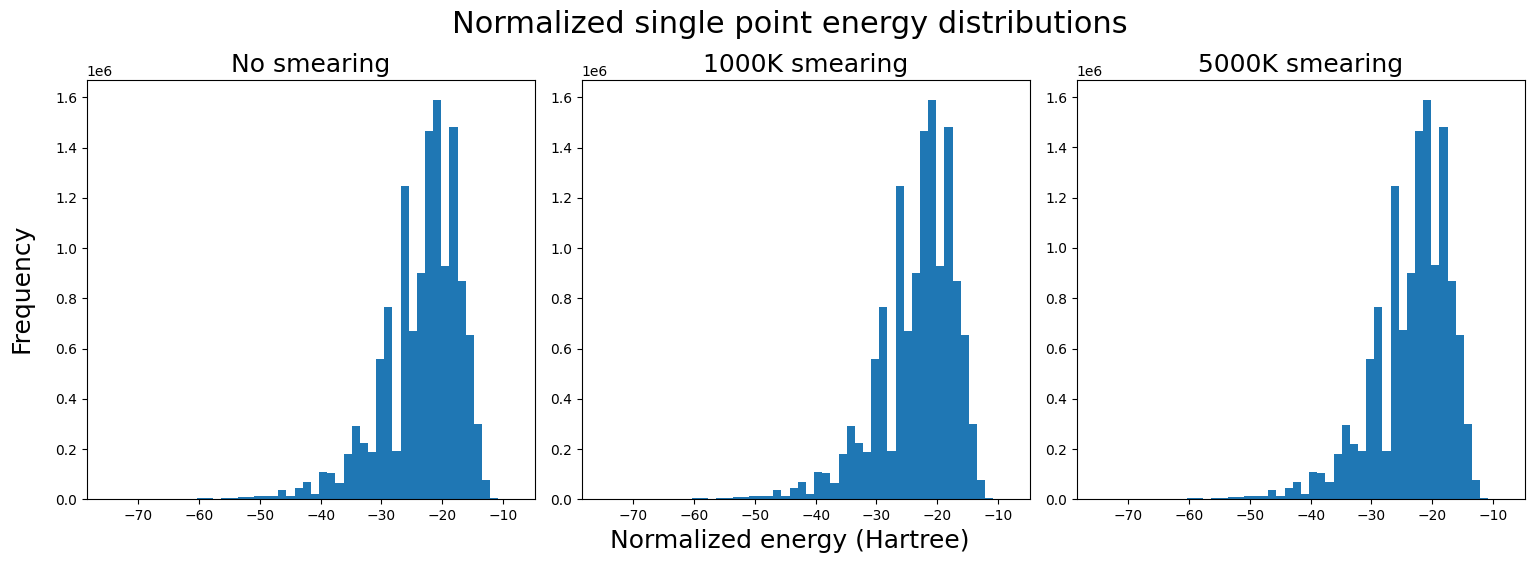

In [15]:
# create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1,3, figsize=(15,5))
# plot the histogram of normalized energies
keys_to_plot = ['No smearing', '1000K smearing', '5000K smearing']
for i, (k,v) in enumerate(ret.items()):
    axs[i].hist(v, bins=50)
    axs[i].set_title(keys_to_plot[i], fontsize=smaller_size)

#add a title to the figure
fig.text(0.5, 1.01, 'Normalized single point energy distributions', ha='center', fontsize=title_size)
#add public x label
fig.text(0.5, -0.02, 'Normalized energy (Hartree)', ha='center', fontsize=smaller_size)
#add public y label
fig.text(-0.02, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=smaller_size)
fig.tight_layout()
plt.show()

In [5]:
# FOD distributions
traverse_tool = partial(partial_traverse_tool, datadir=bb_source_dir, accumulate=lambda x,y:np.concatenate((x,y)))
@traverse_tool
def check_energy(db):
    N = int(Path(db.fid.name).stem)
    return {'b973c_etemp1000.fod':db['b973c_etemp1000.fod'],
            'b973c_etemp5000.fod':db['b973c_etemp5000.fod']}

ret = check_energy()

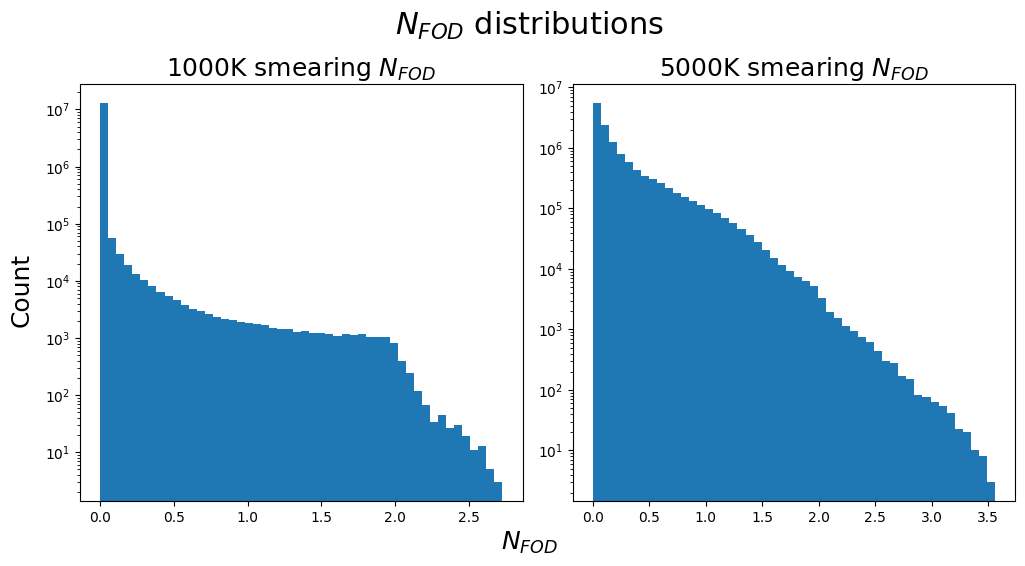

In [8]:
# create a figure with 1 row and 2 columns
fig, axs = plt.subplots(1,2, figsize=(10,5))
# plot the histogram of normalized energies
keys_to_plot = [r'1000K smearing $N_{FOD}$', r'5000K smearing $N_{FOD}$']
for i, (k,v) in enumerate(ret.items()):
    axs[i].hist(v, bins=50, log=True)
    axs[i].set_title(keys_to_plot[i], fontsize=smaller_size)

#add a title to the figure
fig.text(0.5, 1.01, r'$N_{FOD}$ distributions', ha='center', fontsize=title_size)
#add public x label
fig.text(0.5, -0.02, r'$N_{FOD}$', ha='center', fontsize=smaller_size)
#add public y label
fig.text(-0.02, 0.5, 'Count', va='center', rotation='vertical', fontsize=smaller_size)
fig.tight_layout()
plt.show()

In [48]:
# distribution of bond types to break
def to_key(l):
    return '%d-%d'%(l[0],l[1]) if l[0]<=l[1] else '%d-%d'%(l[1],l[0])

traverse_tool = partial(partial_traverse_tool, datadir=bb_source_dir, accumulate=lambda x,y:x+y)
@traverse_tool
def count_bond(db):
    bond, count = np.unique(np.array([to_key(x[y]) for x,y in zip(db['numbers'],db['scan_atoms'])]),axis=0, return_counts=True)
    return {k:v for k,v in zip(bond,count)}
            
ret = count_bond()
ret

{'1-6': 2605085,
 '1-7': 526291,
 '1-8': 71485,
 '6-6': 4538619,
 '6-7': 2771836,
 '6-8': 1610425,
 '7-7': 525759,
 '7-8': 400824,
 '8-8': 94553}

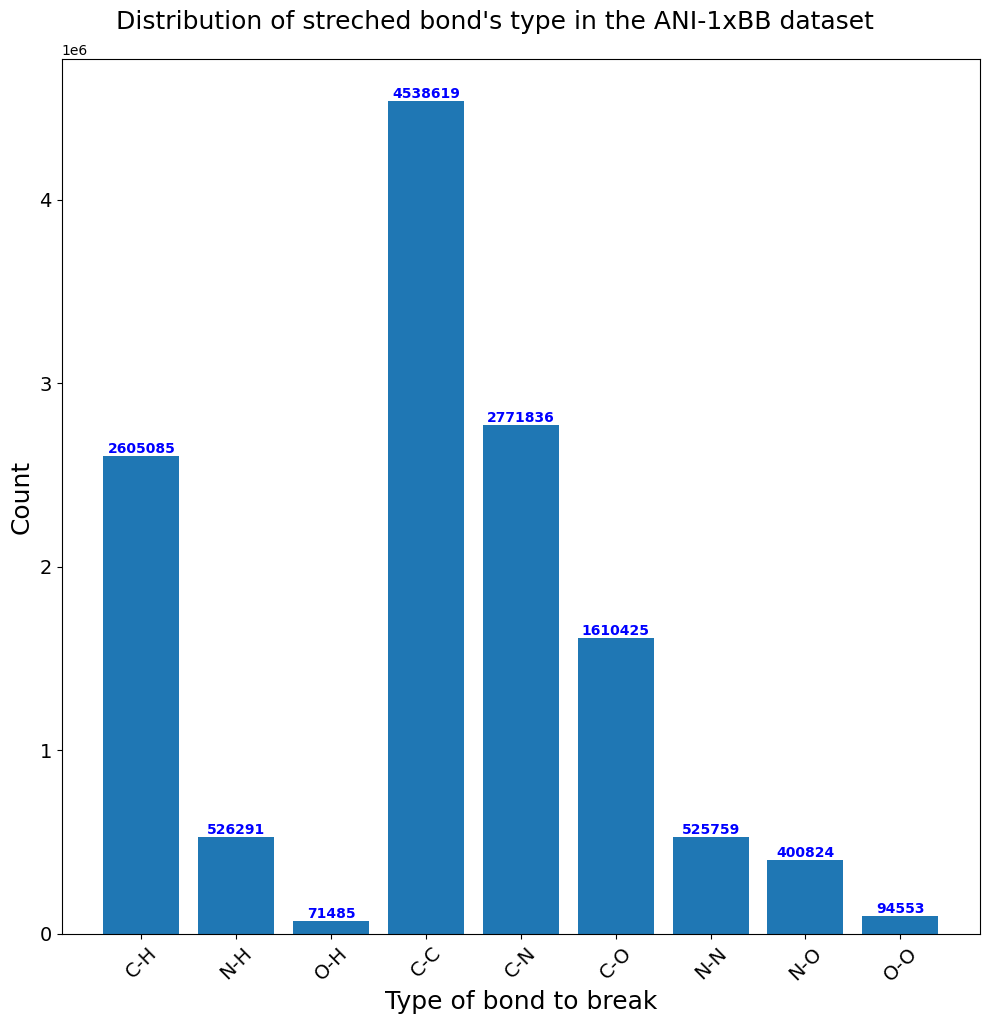

In [59]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
keys_to_show = ['C-H', 'N-H', 'O-H', 'C-C', 'C-N', 'C-O', 'N-N', 'N-O', 'O-O']
counts = list(ret.values())
ax.bar(range(len(keys_to_show)), counts)

for i,c in zip(range(len(keys_to_show)), counts):
    plt.text(i, c, str(c) , color='blue', fontweight='bold'
                , ha='center', va='bottom'
                , fontsize=10)

# set labels and title
ax.set_xlabel("Type of bond to break", fontsize=smaller_size)
ax.set_ylabel("Count", fontsize=smaller_size)
#ax.set_title("Distribution of streched bond's type in the ANI-1xBB dataset", fontsize=smaller_size)
fig.text(0.5, 1.0, "Distribution of streched bond's type in the ANI-1xBB dataset", ha='center', fontsize=smaller_size)
# set xticks to texts
ax.set_xticks(range(len(keys_to_show)))
ax.set_xticklabels(keys_to_show)
# set tick size
ax.tick_params(axis='y', which='major', labelsize=tick_size)
ax.tick_params(axis='x', which='major', labelsize=tick_size, rotation=45)
plt.tight_layout()
plt.show()